In [1]:
##################################################################
# # ! Juno Magnetic Modelling using <Vector Potential> with <3 NNs>
# Table & Plot showing the RMS errors of 'SH models' & `PINN Models` 
# computed at each perijove orbit of ***Juno Observation Orbits***
##################################################################
# %%
# # ! Setup
import numpy as np;
import matplotlib.pyplot as plt;
from LW_DataReadWrite import *;

In [2]:
# %%

# # ! RMS of PINN Models Estimations of |B| at <Obs>: at individual orbit
# TODO ******************** Parameters ******************** #
cstRJ = 71492;      # Jupiter radius in km
GS2nT = 1e5;        # Gauss to nt
stsRJ = 4.0;          # Data for statistics (For comparison to other studies)
# TODO ********************** end ************************* #
fileObs='input/Juno_PJ01_50_4.0Rj.txt';
nObs,PJ,Year,DD,xObs,yObs,zObs,BxObs,ByObs,BzObs = LoadObsFile(fileObs,showinfo=False);
xObs=xObs/cstRJ; yObs=yObs/cstRJ; zObs=zObs/cstRJ;          # Distance in RJ
RObs=np.sqrt(xObs**2+yObs**2+zObs**2); 
refBNorm = np.sqrt(BxObs**2 + ByObs**2 + BzObs**2);
FILEs = ['output/JRM33_I30MDa_nmax18_EstBxyz_OurObs50.txt',\
         'output/Bloxham_I32MDb_nmax32_EstBxyz_OurObs50.txt',\
         'output/JUNO_PINN_VP3_PJ01_33_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_OurObs50.txt',\
         'output/JUNO_PINN_VP3_PJ01_50_4.0Rj_NN06_040_swish_Adam_DW1_RADk1c0n3000d600_nEpo0012000_BS0010000_Seed12345_EstBxyz_OurObs50.txt',];
MODELs = ['JRM33 (n=18)','Baseline (n=32)','PINN33e','PINN50e'];

nMODEL = len(MODELs); 
pjs = np.unique(PJ); npj = pjs.size;
RMS = [[] for i in range(nMODEL)]; # RMS on each orbit
E2 = [[] for i in range(nMODEL)];  # E2 error (L2 norm relative error %) on each orbit
ERRORs = [[] for i in range(nMODEL)];
for iMODEL in range(nMODEL):
     modelName = MODELs[iMODEL];
     fileEst = FILEs[iMODEL];
     dataEst=np.loadtxt(fileEst,skiprows=1);
     estBx=dataEst[:,6:7]; estBy=dataEst[:,7:8]; estBz=dataEst[:,8:9];
     estBNorm=np.sqrt(estBx**2+estBy**2+estBz**2);
     print('\n*********************\n',flush=True);
     print('RMS of %s evaluated at Juno <OBS>:'%(modelName),flush=True);
     for ipj in range(npj):
          curpj = pjs[ipj];
          pkInd = np.logical_and((PJ==curpj),(RObs<=stsRJ));
          refBx_pj = BxObs[pkInd]; refBy_pj = ByObs[pkInd]; refBz_pj = BzObs[pkInd];
          refBNorm_pj = refBNorm[pkInd];
          estBx_pj = estBx[pkInd]; estBy_pj = estBy[pkInd]; estBz_pj = estBz[pkInd];
          estBNorm_pj = estBNorm[pkInd];
          err_dB = estBNorm_pj - refBNorm_pj;   # Delta |B|
          err_DB = np.sqrt((estBx_pj-refBx_pj)**2+(estBy_pj-refBy_pj)**2+(estBz_pj-refBz_pj)**2);   # |Delta B|
          err_dBxyz = np.concatenate((estBx_pj-refBx_pj,estBy_pj-refBy_pj,estBz_pj-refBz_pj),axis=0);  # Delta Bx, By, Bz
          # rms = np.sqrt(np.mean(err_dB**2));
          # rms = np.sqrt(np.mean(err_DB**2));
          rms = np.sqrt(np.mean(err_dBxyz**2));
          print('PJ[%02d], NOB: %4d, '%(curpj,np.count_nonzero(pkInd)),end='',flush=True);
          refBxyz_pj = np.concatenate((refBx_pj,refBy_pj,refBz_pj),axis=0);
          refRMS = np.sqrt(np.mean(refBxyz_pj**2))
          e2 = rms/refRMS; # e2 = rms/np.sqrt(np.mean(refBNorm_pj**2)) for the other two
          print('rms = %8.1f nT; E2 = %8.4f %%'%(GS2nT*rms,100*e2),flush=True);
          RMS[iMODEL].append(GS2nT*rms);
          E2[iMODEL].append(100*e2);
          ERRORs[iMODEL].append(GS2nT*err_dBxyz);
     print('',flush=True); # <br>


*********************

RMS of JRM33 (n=18) evaluated at Juno <OBS>:
PJ[01], NOB:  572, rms =   1477.4 nT; E2 =   1.1192 %
PJ[03], NOB:  571, rms =    249.9 nT; E2 =   0.2880 %
PJ[04], NOB:  571, rms =    285.2 nT; E2 =   0.3272 %
PJ[05], NOB:  572, rms =    749.5 nT; E2 =   0.5263 %
PJ[06], NOB:  570, rms =    707.3 nT; E2 =   0.4683 %
PJ[07], NOB:  571, rms =    560.1 nT; E2 =   0.5958 %
PJ[08], NOB:  571, rms =    497.5 nT; E2 =   0.4991 %
PJ[09], NOB:  572, rms =    487.7 nT; E2 =   0.4649 %
PJ[10], NOB:  570, rms =    422.8 nT; E2 =   0.4640 %
PJ[11], NOB:  569, rms =    463.7 nT; E2 =   0.3626 %
PJ[12], NOB:  570, rms =    799.4 nT; E2 =   0.6132 %
PJ[13], NOB:  567, rms =    365.4 nT; E2 =   0.4246 %
PJ[14], NOB:  566, rms =   1209.1 nT; E2 =   0.9552 %
PJ[15], NOB:  568, rms =    427.9 nT; E2 =   0.4149 %
PJ[16], NOB:  569, rms =    503.0 nT; E2 =   0.4903 %
PJ[17], NOB:  572, rms =    474.8 nT; E2 =   0.2949 %
PJ[18], NOB:  570, rms =    695.6 nT; E2 =   0.6280 %
PJ[19], NOB: 

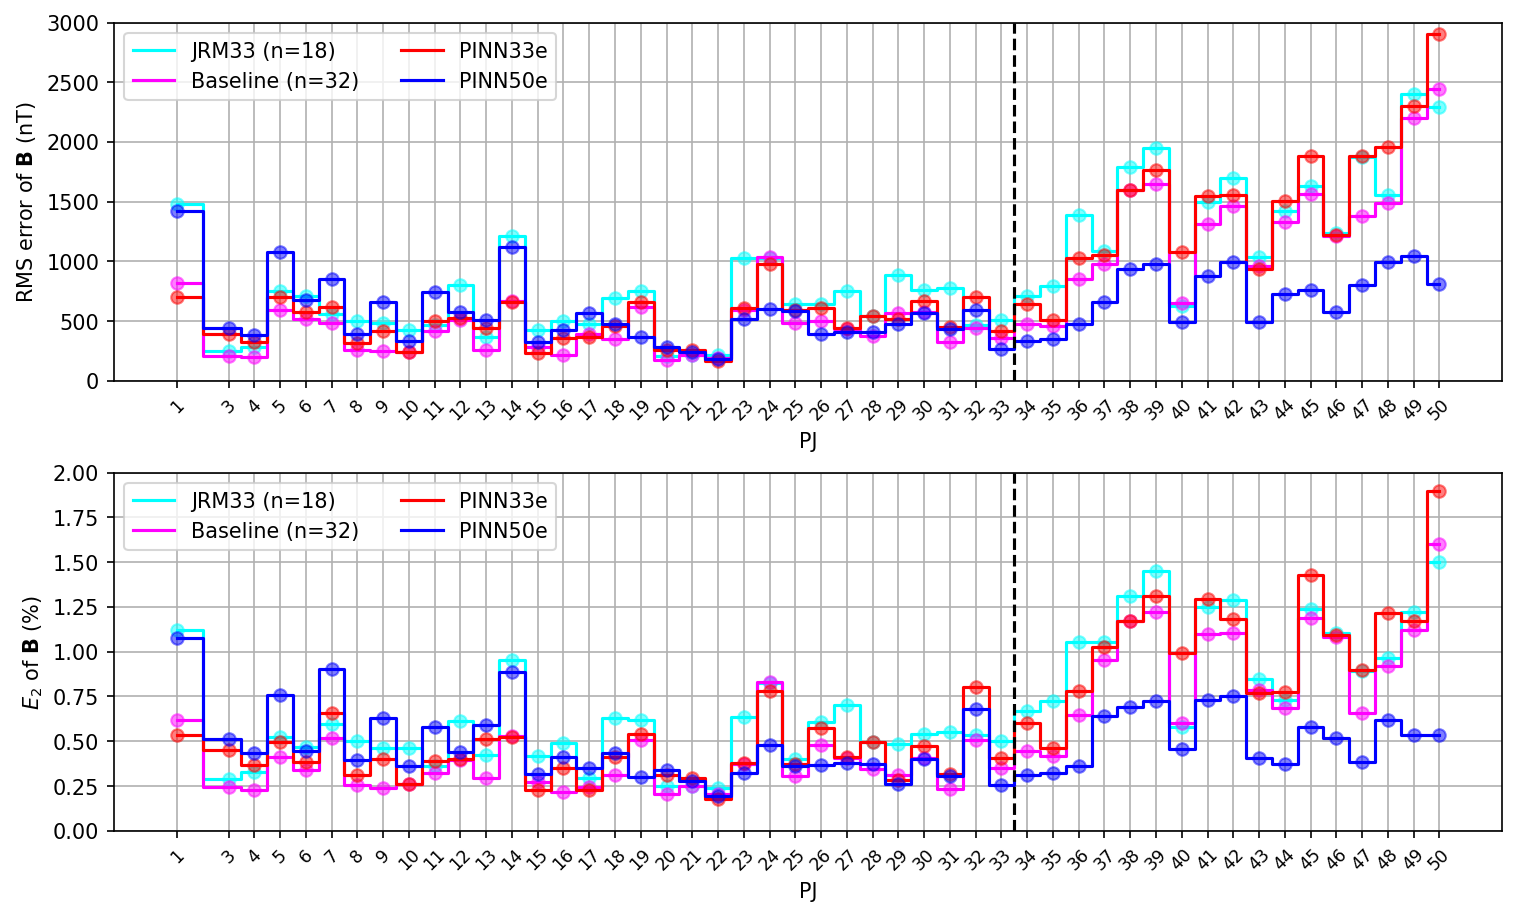

In [3]:
# %%

# # ! Plot of PINN Models Estimations Error of |B| at <Obs>: at individual orbit
pkMODELS = np.array([1,2,3,4])-1;
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), dpi=150, layout='constrained');
yLables=['RMS error of $\mathbf{B}$ (nT)','$E_2$ of $\mathbf{B}$ (%)'];
COLORs =['#00FFFF','#FF00FF','#FF0000','#0000FF'];
LSs = ['-','-','-','-'];
MARKERs =['o','o','o','o'];
for iMODEL in pkMODELS:
     modelName = MODELs[iMODEL];
     axs[0].step(pjs,RMS[iMODEL],color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[0].plot(pjs,RMS[iMODEL], MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
     axs[0].set_ylim(bottom=0,top=3000);
     axs[1].step(pjs,E2[iMODEL], color=COLORs[iMODEL],linestyle=LSs[iMODEL],where='mid',label=modelName);
     axs[1].plot(pjs,E2[iMODEL],  MARKERs[iMODEL], color=COLORs[iMODEL],linestyle='',alpha=0.5);
     axs[1].set_ylim(bottom=0,top=2);
for iax in range(len(axs)):
     axs[iax].axvline(33.5,color='black',linestyle='--');
     axs[iax].set_xticks(pjs);
     axs[iax].xaxis.grid(True);
     axs[iax].yaxis.grid(True);
     axs[iax].set_xlabel('PJ');
     axs[iax].set_ylabel(yLables[iax]);
     axs[iax].legend(loc='best', ncol = pkMODELS.size//2)  # Add a legend
     axs[iax].tick_params(axis='x',which='major',labelrotation=45,labelsize='small');
plt.savefig('Fig4.png',dpi=300);
plt.show();